In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style= 'white')

In [28]:
from scipy.stats import pearsonr

In [2]:
ss_lb = pd.read_csv('SS.Left-behind.csv')
ss_nlb = pd.read_csv('SS.Non-Left-behind.csv')
pwb_lb = pd.read_csv('PWB.Left-behind_1.csv')
pwb_nlb = pd.read_csv('PWB.Non-left-behind.csv')

In [3]:
df_comb = pd.DataFrame()
df_comb['ss_lb'] = ss_lb.iloc[:, -1]
df_comb['ss_nlb'] = ss_nlb.iloc[:, -1]
df_comb['pwb_lb'] = pwb_lb.iloc[:, -1]
df_comb['pwb_nlb'] = pwb_nlb.iloc[:, -43: -1].sum(axis = 1)

df_comb.head()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
0,42,47,211,210
1,40,42,207,193
2,40,43,206,210
3,39,42,191,190
4,41,41,209,212


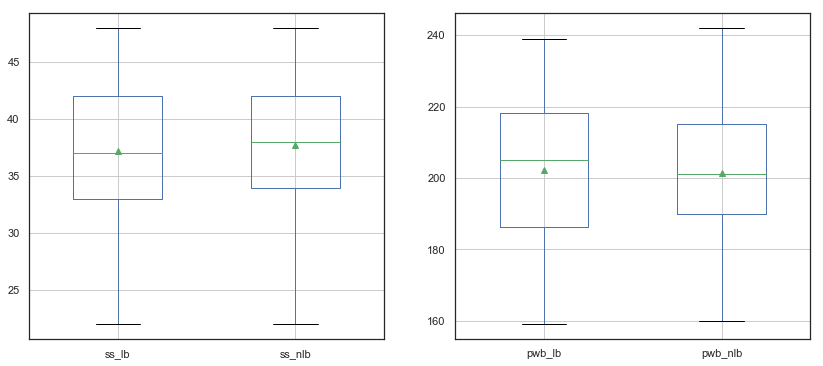

In [79]:
plt.figure(figsize= (14, 6))
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")

plt.subplot(1, 2, 1)
df_comb.iloc[:, :2].boxplot(widths = (0.5, 0.5), showmeans = True)

plt.subplot(1, 2, 2)
df_comb.iloc[:, 2:].boxplot(widths = (0.5, 0.5), showmeans = True)
plt.show()

# Summary Statistics

Make a box plot 

In [4]:
df_comb.describe()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
count,80.000000,80.000000,80.000000,80.000000
mean,37.225000,37.700000,202.200000,201.337500
std,5.854729,5.803534,20.199887,19.251792
min,22.000000,22.000000,159.000000,160.000000
25%,33.000000,34.000000,186.250000,190.000000
50%,37.000000,38.000000,205.000000,201.000000
75%,42.000000,42.000000,218.250000,215.000000
max,48.000000,48.000000,239.000000,242.000000


# Correlation 

Find pearson correlation and its p-value

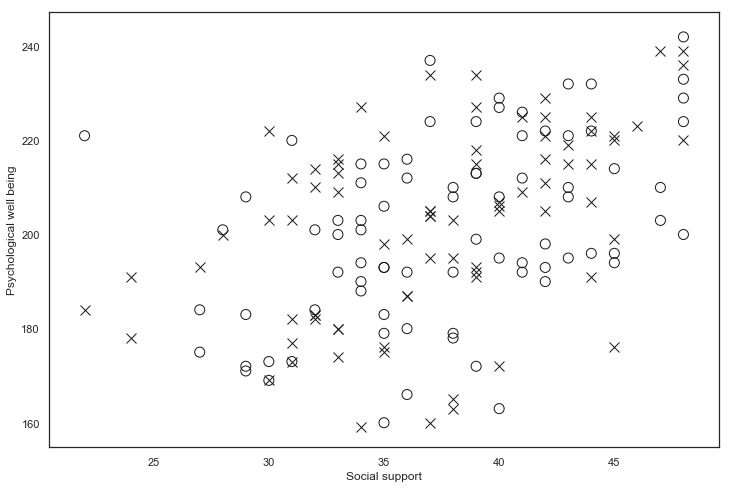

In [10]:
plt.figure(figsize= (12, 8))
plt.plot(df_comb['ss_lb'], df_comb['pwb_lb'], 'kx', markersize = 10)
plt.scatter(df_comb['ss_nlb'], df_comb['pwb_nlb'], s = 100, facecolors='none', edgecolors='k')
plt.xlabel('Social support')
plt.ylabel('Psychological well being')
plt.show()

In [29]:
pearsonr(df_comb['ss_lb'], df_comb['pwb_lb'])

(0.4768742693823513, 7.749811960732086e-06)

In [30]:
pearsonr(df_comb['ss_nlb'], df_comb['pwb_nlb'])

(0.43483597599401624, 5.5647622931268286e-05)

In [36]:
pearsonr(df_comb['ss_lb'].append(df_comb['ss_nlb']), df_comb['pwb_lb'].append(df_comb['pwb_nlb']))

(0.4549703748156383, 1.5023170330909118e-09)

# Distribution 

Make subplot

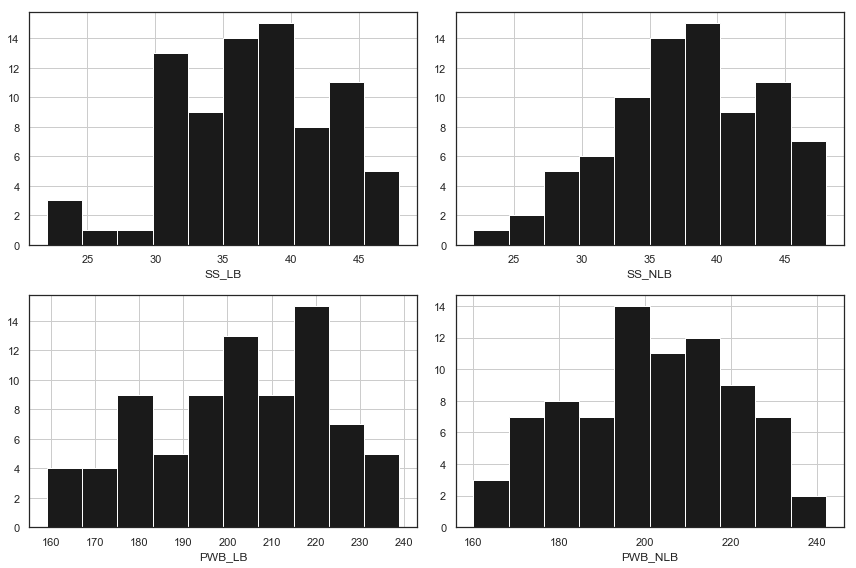

In [59]:
plt.figure(figsize= (12, 8))
plt.subplot(2, 2, 1)
df_comb['ss_lb'].hist(bins = 10, color = 'k')
plt.xlabel('SS_LB')

plt.subplot(2,2,2)
df_comb['ss_nlb'].hist(bins = 10, color = 'k')
plt.xlabel('SS_NLB')

plt.subplot(2,2,3)
df_comb['pwb_lb'].hist(bins = 10, color = 'k')
plt.xlabel('PWB_LB')

plt.subplot(2,2,4)
df_comb['pwb_nlb'].hist(bins = 10, color = 'k')
plt.xlabel('PWB_NLB')

plt.tight_layout()
plt.show()

# t-Test 

In [15]:
mean_ss_lb = df_comb['ss_lb'].mean()
mean_ss_nlb = df_comb['ss_nlb'].mean()
mean_pwb_lb = df_comb['pwb_lb'].mean()
mean_pwb_nlb = df_comb['pwb_nlb'].mean()

In [16]:
std_ss_lb = df_comb['ss_lb'].std()
std_ss_nlb = df_comb['ss_nlb'].std()
std_pwb_lb = df_comb['pwb_lb'].std()
std_pwb_nlb = df_comb['pwb_nlb'].std()

In [23]:
mean_diff_ss = mean_ss_lb - mean_ss_nlb
mean_diff_pwb = mean_pwb_lb - mean_pwb_nlb

In [22]:
n = len(df_comb)

se_ss = np.sqrt(std_ss_lb ** 2 /n + std_ss_nlb ** 2 /n )
se_pwb = np.sqrt(std_pwb_lb ** 2 /n + std_pwb_nlb ** 2 /n )

In [26]:
mean_diff_ss/se_ss

-0.5153657561683429

In [27]:
mean_diff_pwb/se_pwb

0.27645740798676